In [58]:
import numpy as np 
import matplotlib.pyplot as plt 
from uncertainties import ufloat
import uncertainties.unumpy as unp
import math
import scipy.constants as const

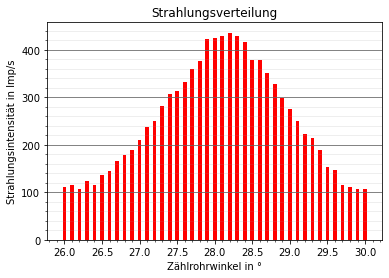

In [59]:
ThetaGMr=np.genfromtxt('bragg.dat', usecols=(1))
NBraggr=np.genfromtxt('bragg.dat', usecols=(2))
NBragg=NBraggr*2
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')

plt.bar(ThetaGMr,NBragg, width=0.05, color='r')
plt.title('Strahlungsverteilung')
plt.ylabel('Strahlungsintensität in Imp/s')
plt.xlabel('Zählrohrwinkel in °')
plt.savefig('Braggwinkel.pdf')

K Alpha Peak Winkel: 1.3908611455660976e-10  Höhe 1599.0
K Beta Peak Winkel: 1.5414488655665816e-10 Höhe 5050.0
FWHM Punkt 1 Wellenlänge= 1.381674112427722e-10 m Höhe 799.5
FWHM Punkt 2 Wellenlänge= 1.4142902867232527e-10 m Höhe 799.5
FWHM Punkt 3 Wellenlänge= 1.5320498025631295e-10 m Höhe 2525.0
FWHM Punkt 4 Wellenlänge= 1.5640993230948057e-10 m Höhe 2525.0


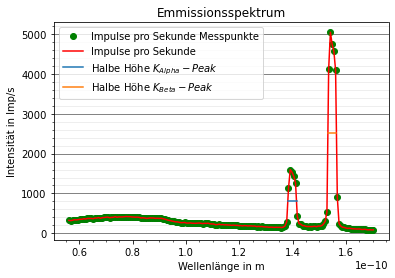

In [60]:

ThetaEm=np.genfromtxt('Emissionsspektrum.dat', usecols=(0))
ThetaEmRAD=ThetaEm*math.pi/180
Nem=np.genfromtxt('Emissionsspektrum.dat', usecols=(1))
d=201.4e-12
Lamda=2*d*np.sin(ThetaEmRAD)
NemOU=Nem
Kalpha=122
Kbeta=145
print('K Alpha Peak Winkel:',Lamda[Kalpha],' Höhe',NemOU[Kalpha])
print('K Beta Peak Winkel:',Lamda[Kbeta],'Höhe',NemOU[Kbeta])
u=120 #Messpunkt vor FWHM Punkt 1
v=125 #Messpunkt vor FWHM Punkt 2
w=143 #Messpunkt vor FWHM Punkt 3
q=148 #Messpunkt vor FWHM Punkt 4
einsm=(NemOU[u]-NemOU[u+1])/(Lamda[u]-Lamda[u+1])
zweim=(NemOU[v]-NemOU[v+1])/(Lamda[v]-Lamda[v+1])
dreim=(NemOU[w]-NemOU[w+1])/(Lamda[w]-Lamda[w+1])
vierm=(NemOU[q]-NemOU[q+1])/(Lamda[q]-Lamda[q+1])
einsb=NemOU[u]-(einsm*Lamda[u])
zweib=NemOU[v]-(zweim*Lamda[v])
dreib=NemOU[w]-(dreim*Lamda[w])
vierb=NemOU[q]-(vierm*Lamda[q])
einsy=NemOU[Kalpha]/2
zweiy=NemOU[Kalpha]/2
dreiy=NemOU[Kbeta]/2
viery=NemOU[Kbeta]/2
eins=(einsy-einsb)/einsm
zwei=(zweiy-zweib)/zweim
drei=(dreiy-dreib)/dreim
vier=(viery-vierb)/vierm
#Intervalle zum zeichnen der halben Peak Höhe
x = np.linspace(eins, zwei)
y = np.linspace(drei, vier)
#Intervalle zum zeichnen der Interpolationsgraden
fuck1=np.linspace(1.37e-10,1.4e-10)
fuck2=np.linspace(1.4e-10,1.42e-10)
fuck3=np.linspace(1.53e-10,1.537e-10)
fuck4=np.linspace(1.57e-10,1.57e-10)
#Berechnung der Energie
E=const.h*const.c/Lamda/const.e
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
#####Plots der Interpolationsgraden
#plt.plot(fuck1,einsm*fuck1+einsb)
#plt.plot(fuck2,zweim*fuck2+zweib)
#plt.plot(fuck3,dreim*fuck3+dreib)
#plt.plot(fuck4,vierm*fuck4+vierb)
plt.plot(Lamda,Nem, 'go',label='Impulse pro Sekunde Messpunkte')#Plot der Messpunkte
plt.plot(Lamda,Nem, color='r',label='Impulse pro Sekunde')      #Plot der Messlinie
plt.plot(x,(NemOU[Kalpha]/2)*(x/x), label='Halbe Höhe $K_{Alpha}-Peak$')#Plot der einhalb Kalpha Line
plt.plot(y,(NemOU[Kbeta]/2)*(y/y),label="Halbe Höhe $K_{Beta}-Peak$")   #Plot der einhalb Kbeta line
plt.legend(loc='best')
plt.title('Emmissionsspektrum')
plt.ylabel('Intensität in Imp/s')
plt.xlabel('Wellenlänge in m')
plt.savefig('Emmisionssprktrum.pdf')
print('FWHM Punkt 1 Wellenlänge=',eins,'m Höhe',NemOU[Kalpha]/2)
print('FWHM Punkt 2 Wellenlänge=',zwei,'m Höhe',NemOU[Kalpha]/2)
print('FWHM Punkt 3 Wellenlänge=',drei,'m Höhe',NemOU[Kbeta]/2)
print('FWHM Punkt 4 Wellenlänge=',vier,'m Höhe',NemOU[Kbeta]/2)


K Alpha Peak: 1599.0 8.914203896517447  KeV
K Beta Peak: 5050.0 8.04335461284524  KeV
K Alpha halbe: 799.5 8.914203896517447  KeV
K Beta halbe: 2525.0 8.04335461284524  KeV
E-Alpha 1: 8.97347625738961 KeV
E-Alpha 2: 8.766531142659357 KeV
E-Beta 1: 8.092700265081062 KeV
E-Beta 2: 7.9268750137861375 KeV
Delta E-Alpha: 0.2069451147302534 Kev
Delta E-Beta: 0.16582525129492479 Kev


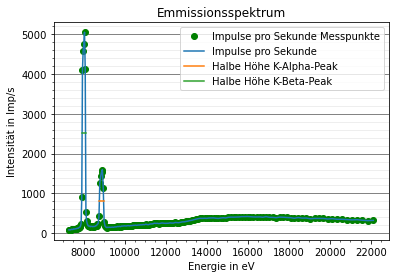

In [61]:
a=const.h*const.c/x/const.e
b=const.h*const.c/y/const.e
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.plot(E,Nem,'go',label='Impulse pro Sekunde Messpunkte')
plt.plot(E,Nem,label='Impulse pro Sekunde')
plt.plot(a,NemOU[Kalpha]/2*a/a, label='Halbe Höhe K-Alpha-Peak')
plt.plot(b,NemOU[Kbeta]/2*b/b,label='Halbe Höhe K-Beta-Peak')
plt.legend(loc='best')
plt.title('Emmissionsspektrum')
plt.ylabel('Intensität in Imp/s')
plt.xlabel('Energie in eV')
plt.savefig('EmmisionssprktrumII.pdf')
print('K Alpha Peak:',NemOU[Kalpha],const.h*const.c/Lamda[Kalpha]/const.e/1000,' KeV')
print('K Beta Peak:',NemOU[Kbeta],const.h*const.c/Lamda[Kbeta]/const.e/1000,' KeV')
print('K Alpha halbe:',NemOU[Kalpha]/2,const.h*const.c/Lamda[Kalpha]/const.e/1000,' KeV')
print('K Beta halbe:',NemOU[Kbeta]/2,const.h*const.c/Lamda[Kbeta]/const.e/1000,' KeV')
print('E-Alpha 1:',const.h*const.c/const.e/1000/eins,'KeV')
print('E-Alpha 2:',const.h*const.c/const.e/1000/zwei,'KeV')
print('E-Beta 1:',const.h*const.c/const.e/1000/drei,'KeV')
print('E-Beta 2:',const.h*const.c/const.e/1000/vier,'KeV')
print('Delta E-Alpha:',(const.h*const.c/const.e/(eins)-(const.h*const.c/const.e/zwei))/1000,'Kev')
print('Delta E-Beta:',(const.h*const.c/const.e/(drei)-(const.h*const.c/const.e/vier))/1000,'Kev')


In [69]:
#Berechnung des Auflösungsvermögens
DEAlpha=(const.h*const.c/const.e/(eins)-(const.h*const.c/const.e/zwei))/1000
DEBeta=(const.h*const.c/const.e/(drei)-(const.h*const.c/const.e/vier))/1000
EKAlpha=(const.h*const.c/Lamda[Kalpha]/const.e/1000)
EKBeta=(const.h*const.c/Lamda[Kbeta]/const.e/1000)
print('Ekalpha=',EKAlpha)
print('Ekbeta=',EKBeta)
print('Alpha A=',EKAlpha/DEAlpha)
print('Beta A=',EKBeta/DEBeta)

Ekalpha= 8.914203896517447
Ekbeta= 8.04335461284524
Alpha A= 43.07520816877866
Beta A= 48.50500481702821


In [94]:
#Berechnung der Absorbtionskonstanten
Z=29
n=1
m=2
l=3
R=0.0136
EKABS=8.98796

Sigma1=Z-np.sqrt(EKABS/R)
Sigma2=Z-(m*np.sqrt(((R*(Z-Sigma1)**2)-EKAlpha)/R))
Sigma3=Z-(l*np.sqrt(((R*(Z-Sigma1)**2)-EKBeta)/R))

print('Sigma1=',Sigma1)
print('Sigma2=',Sigma2)
print('Sigma3=',Sigma3)

Sigma1= 3.292425011979333
Sigma2= 24.34242857139961
Sigma3= 3.997869966633761


IKBrom 18.0
[12.8 12.9 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1
 14.2 14.3] [10. 12.  9. 13. 18. 21. 25. 27. 27. 22. 25. 21. 23. 20. 21. 19.]


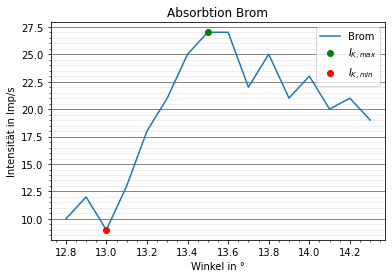

In [99]:
ThetaBrom=np.genfromtxt('Brom.dat', usecols=(0))
ThetaGallium=np.genfromtxt('Gallium.dat', usecols=(0))
ThetaRubidium=np.genfromtxt('Rubidium.dat', usecols=(0))
ThetaStrontium=np.genfromtxt('Strontium.dat', usecols=(0))
ThetaZink=np.genfromtxt('Zink.dat', usecols=(0))
ThetaZirkonium=np.genfromtxt('Zirkonium.dat', usecols=(0))
NBrom=np.genfromtxt('Brom.dat', usecols=(1))
NGallium=np.genfromtxt('Gallium.dat', usecols=(1))
NRubidium=np.genfromtxt('Rubidium.dat', usecols=(1))
NStrontium=np.genfromtxt('Strontium.dat', usecols=(1))
NZink=np.genfromtxt('Zink.dat', usecols=(1))
NZirkonium=np.genfromtxt('Zirkonium.dat', usecols=(1))
g = np.linspace(13, 15)
IKmiBrom=9
IKmaBrom=27
TmaBrom=13.5
TmiBrom=13
IKBrom=IKmiBrom+(IKmaBrom-IKmiBrom)/2
print('IKBrom',IKBrom)
mBrom=(IKmiBrom-IKmaBrom)/(TmiBrom-TmaBrom)
bBrom=IKmiBrom-mBrom*TmiBrom
TBrom=(IKBrom-bBrom)/mBrom
#print(mBrom,bBrom,TBrom)
plt.plot(ThetaBrom,NBrom, label='Brom')
plt.plot(13.5,27,'go',label="$I_{K,max}$")
plt.plot(13,9,'ro',label="$I_{K,min}$")
#plt.plot(g,mBrom*g+bBrom)
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.legend(loc='best')
plt.title('Absorbtion Brom')
plt.xlabel('Winkel in °')
plt.ylabel('Intensität in Imp/s')
plt.savefig('AbsorbtionsspektrumBrom.pdf')
print(ThetaBrom,NBrom)

206.5
[ 9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8
 10.9 11. ] [112. 120. 126. 147. 180. 225. 266. 282. 290. 301. 295. 283. 296. 283.
 286. 286.]


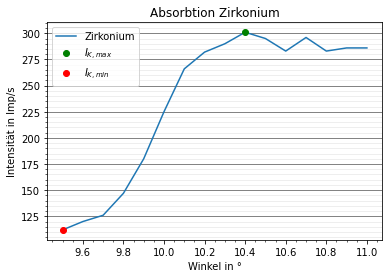

In [108]:
IKmiZirkonium=112
IKmaZirkonium=301
TmaZirkonium=10.4
TmiZirkonium=9.5
mZirkonium=(IKmiZirkonium-IKmaZirkonium)/(TmiZirkonium-TmaZirkonium)
bZirkonium=IKmiZirkonium-mZirkonium*TmiZirkonium
IKZirkonium=IKmiZirkonium+(IKmaZirkonium-IKmiZirkonium)/2
TZirkonium=(IKZirkonium-bZirkonium)/mZirkonium

print(IKZirkonium)
print(ThetaZirkonium,NZirkonium)
plt.plot(ThetaZirkonium,NZirkonium, label='Zirkonium')
plt.plot(10.4,IKmaZirkonium,'go',label="$I_{K,max}$")
plt.plot(9.5,IKmiZirkonium,'ro',label="$I_{K,min}$")
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.legend(loc='best')
plt.title('Absorbtion Zirkonium')
plt.xlabel('Winkel in °')
plt.ylabel('Intensität in Imp/s')
plt.savefig('AbsorbtionsspektrumZirkonium.pdf')

78.0
[18.  18.1 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3
 19.4 19.5] [ 58.  54.  55.  54.  54.  55.  65.  84.  91. 100. 102. 100.  98. 100.
  95.  98.]


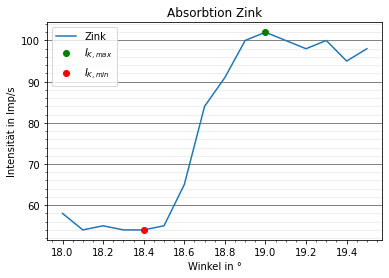

In [105]:

IKmiZink=54
IKmaZink=102
TmaZink=19
TmiZink=18.4
mZink=(IKmiZink-IKmaZink)/(TmiZink-TmaZink)
bZink=IKmiZink-mZink*TmiZink
IKZink=IKmiZink+(IKmaZink-IKmiZink)/2
TZink=(IKZink-bZink)/mZink
print(IKZink)
print(ThetaZink,NZink)
plt.plot(ThetaZink,NZink, label='Zink')
plt.plot(19,IKmaZink,'go',label="$I_{K,max}$")
plt.plot(18.4,IKmiZink,'ro',label="$I_{K,min}$")
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.legend(loc='best')
plt.title('Absorbtion Zink')
plt.xlabel('Winkel in °')
plt.ylabel('Intensität in Imp/s')
plt.savefig('AbsorbtionsspektrumZink.pdf')

116.5
[10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8
 11.9 12. ] [ 43.  41.  40.  44.  50.  89. 120. 152. 181. 193. 181. 196. 181. 173.
 166. 159.]


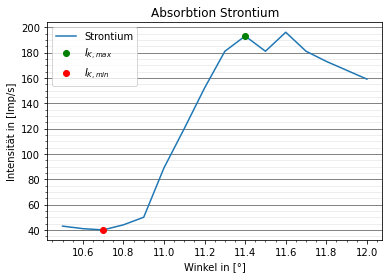

In [110]:
IKmiStrontium=40
IKmaStrontium=193
TmaStrontium=11.4
TmiStrontium=10.7
mStrontium=(IKmiStrontium-IKmaStrontium)/(TmiStrontium-TmaStrontium)
bStrontium=IKmiStrontium-mStrontium*TmiStrontium
IKStrontium=IKmiStrontium+(IKmaStrontium-IKmiStrontium)/2
TStrontium=(IKStrontium-bStrontium)/mStrontium

print(IKStrontium)
print(ThetaStrontium,NStrontium)
plt.plot(ThetaStrontium,NStrontium, label='Strontium')
plt.plot(11.4,IKmaStrontium,'go',label="$I_{K,max}$")
plt.plot(10.7,IKmiStrontium,'ro',label="$I_{K,min}$")
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.legend(loc='best')
plt.title('Absorbtion Strontium')
plt.xlabel('Winkel in [°]')
plt.ylabel('Intensität in [Imp/s]')
plt.savefig('AbsorbtionsspektrumStrontium.pdf')

37.0
[11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5] [11. 10. 10. 12. 17. 32. 39. 47. 57. 64. 61. 57. 54. 54.]


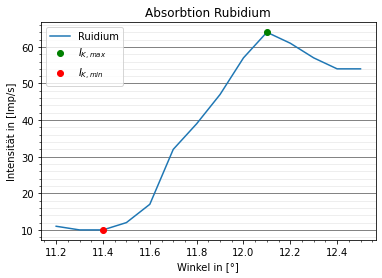

In [111]:
IKmiRubidium=10
IKmaRubidium=64
TmaRubidium=12.1
TmiRubidium=11.4
mRubidium=(IKmiRubidium-IKmaRubidium)/(TmiRubidium-TmaRubidium)
bRubidium=IKmiRubidium-mRubidium*TmiRubidium
IKRubidium=IKmiRubidium+(IKmaRubidium-IKmiRubidium)/2
TRubidium=(IKRubidium-bRubidium)/mRubidium

print(IKRubidium)
print(ThetaRubidium,NRubidium)
plt.plot(ThetaRubidium,NRubidium, label='Ruidium')
plt.plot(12.1,IKmaRubidium,'go',label="$I_{K,max}$")
plt.plot(11.4,IKmiRubidium,'ro',label="$I_{K,min}$")
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.legend(loc='best')
plt.title('Absorbtion Rubidium')
plt.xlabel('Winkel in [°]')
plt.ylabel('Intensität in [Imp/s]')
plt.savefig('AbsorbtionsspektrumRubidium.pdf')

93.5
[17.  17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3
 18.4 18.5 18.6 18.7 18.8 18.9 19. ] [ 66.  66.  78.  88. 102. 116. 121. 121. 122. 122. 119. 114. 110. 108.
 104. 110. 110. 109.  99. 100.  98.]


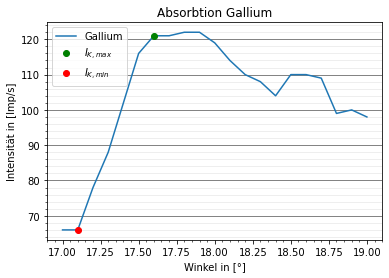

In [115]:
IKmiGallium=66
IKmaGallium=121
TmaGallium=17.6
TmiGallium=17.1
mGallium=(IKmiGallium-IKmaGallium)/(TmiGallium-TmaGallium)
bGallium=IKmiGallium-mGallium*TmiGallium
IKGallium=IKmiGallium+(IKmaGallium-IKmiGallium)/2
TGallium=(IKGallium-bGallium)/mGallium

print(IKGallium)
print(ThetaGallium,NGallium)
plt.plot(ThetaGallium,NGallium, label='Gallium')
plt.plot(17.6,IKmaGallium,'go',label="$I_{K,max}$")
plt.plot(17.1,IKmiGallium,'ro',label="$I_{K,min}$")
plt.grid(b=True, which='major', color='#666666', linestyle='-', axis='y')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2, axis='y')
plt.legend(loc='best')
plt.title('Absorbtion Gallium')
plt.xlabel('Winkel in [°]')
plt.ylabel('Intensität in [Imp/s]')
plt.savefig('AbsorbtionsspektrumGallium.pdf')

In [118]:
print('Theta Brom:',TBrom)
print('Theta Zirkonium',TZirkonium)
print('Theta Zink',TZink)
print('Theta Strontium',TStrontium)
print('Theta Rubidium',TRubidium)
print('Theta Gallium',TGallium)
EBrom=const.h*const.c/(2*d*np.sin(TBrom*math.pi/180)*const.e*1000)
EZirkonium=const.h*const.c/(2*d*np.sin(TZirkonium*math.pi/180)*const.e*1000)
EZink=const.h*const.c/(2*d*np.sin(TZink*math.pi/180)*const.e*1000)
EStrontium=const.h*const.c/(2*d*np.sin(TStrontium*math.pi/180)*const.e*1000)
ERubidium=const.h*const.c/(2*d*np.sin(TRubidium*math.pi/180)*const.e*1000)
EGallium=const.h*const.c/(2*d*np.sin(TGallium*math.pi/180)*const.e*1000)
print('EBrom',EBrom)
print('EZirkonium',EZirkonium)
print('EZink',EZink)
print('EStrontium',EStrontium)
print('ERubidium',ERubidium)
print('EGallium',EGallium)

ZBrom=35
ZZirkonium=40
ZZink=30
ZStrontium=38
ZRubidium=37
ZGallium=31
al=7.297352e-3
SigmaBrom=ZBrom-np.sqrt((EBrom/R)-(al**2*Z**4/4))
SigmaZirkonium=ZZirkonium-np.sqrt((EZirkonium/R)-(al**2*ZZirkonium**4/4))
SigmaZink=ZZink-np.sqrt((EZink/R)-(al**2*ZZink**4/4))
SigmaStrontium=ZStrontium-np.sqrt((EStrontium/R)-(al**2*ZStrontium**4/4))
SigmaRubidium=ZRubidium-np.sqrt((ERubidium/R)-(al**2*ZRubidium**4/4))
SigmaGallium=ZGallium-np.sqrt((EGallium/R)-(al**2*ZGallium**4/4))
print('S Brom',SigmaBrom)
print('S Zirkonium',SigmaZirkonium)
print('S Zimk',SigmaZink)
print('S Strontium',SigmaStrontium)
print('S Rubidium',SigmaRubidium)
print('S Gallium',SigmaGallium)
RBrom=EBrom/((ZBrom-SigmaBrom)**2)
RZirkonium=EZirkonium/((ZZirkonium-SigmaZirkonium)**2)
RZink=EZink/((ZZink-SigmaZink)**2)
RStrontium=EStrontium/((ZStrontium-SigmaStrontium)**2)
RRubidium=ERubidium/((ZRubidium-SigmaRubidium)**2)
RGallium=EGallium/((ZGallium-SigmaGallium)**2)
print('R Brom',RBrom)
print('R Zirkonium',RZirkonium)
print('R Zink',RZink)
print('R Strontium',RStrontium)
print('R Rubidium',RRubidium)
print('R Gallium',RGallium)

Theta Brom: 13.25
Theta Zirkonium 9.95
Theta Zink 18.7
Theta Strontium 11.05
Theta Rubidium 11.75
Theta Gallium 17.35
EBrom 13.42955192434701
EZirkonium 17.81400326565106
EZink 9.600542215555222
EStrontium 16.059529152872013
ERubidium 15.11506620690176
EGallium 10.3218528710222
S Brom 3.7261908794150216
S Zirkonium 4.2820448552516694
S Zimk 3.6345145289510903
S Strontium 4.0428408568959
S Rubidium 4.038635830549907
S Gallium 3.674826884320346
R Brom 0.013730930232098924
R Zirkonium 0.01396330911892595
R Zink 0.01381097110732144
R Strontium 0.013927401899588476
R Rubidium 0.013912324497313838
R Gallium 0.013823939363573304
